# **Problem**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

### ***Attribute Information***

- ID number
-Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

# **Import libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid") 

import warnings
warnings.filterwarnings("ignore")


# **Dowload data**

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv',sep=',')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data=data.drop(['Unnamed: 32','id'],axis=1)

# **Data visualization**

Text(0.5, 1.0, 'Repartition des cancers')

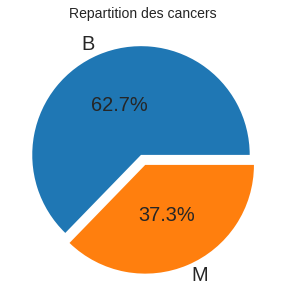

In [12]:
fig=plt.figure(figsize=(5,5))
plt.pie(data['diagnosis'].value_counts(),
        autopct="%.1f%%", 
        explode=[0.05]*2,
        labels=data['diagnosis'].value_counts().index.values,pctdistance=0.5,
        textprops={'fontsize': 20})
plt.title("Repartition des cancers", fontsize=14)

In [13]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

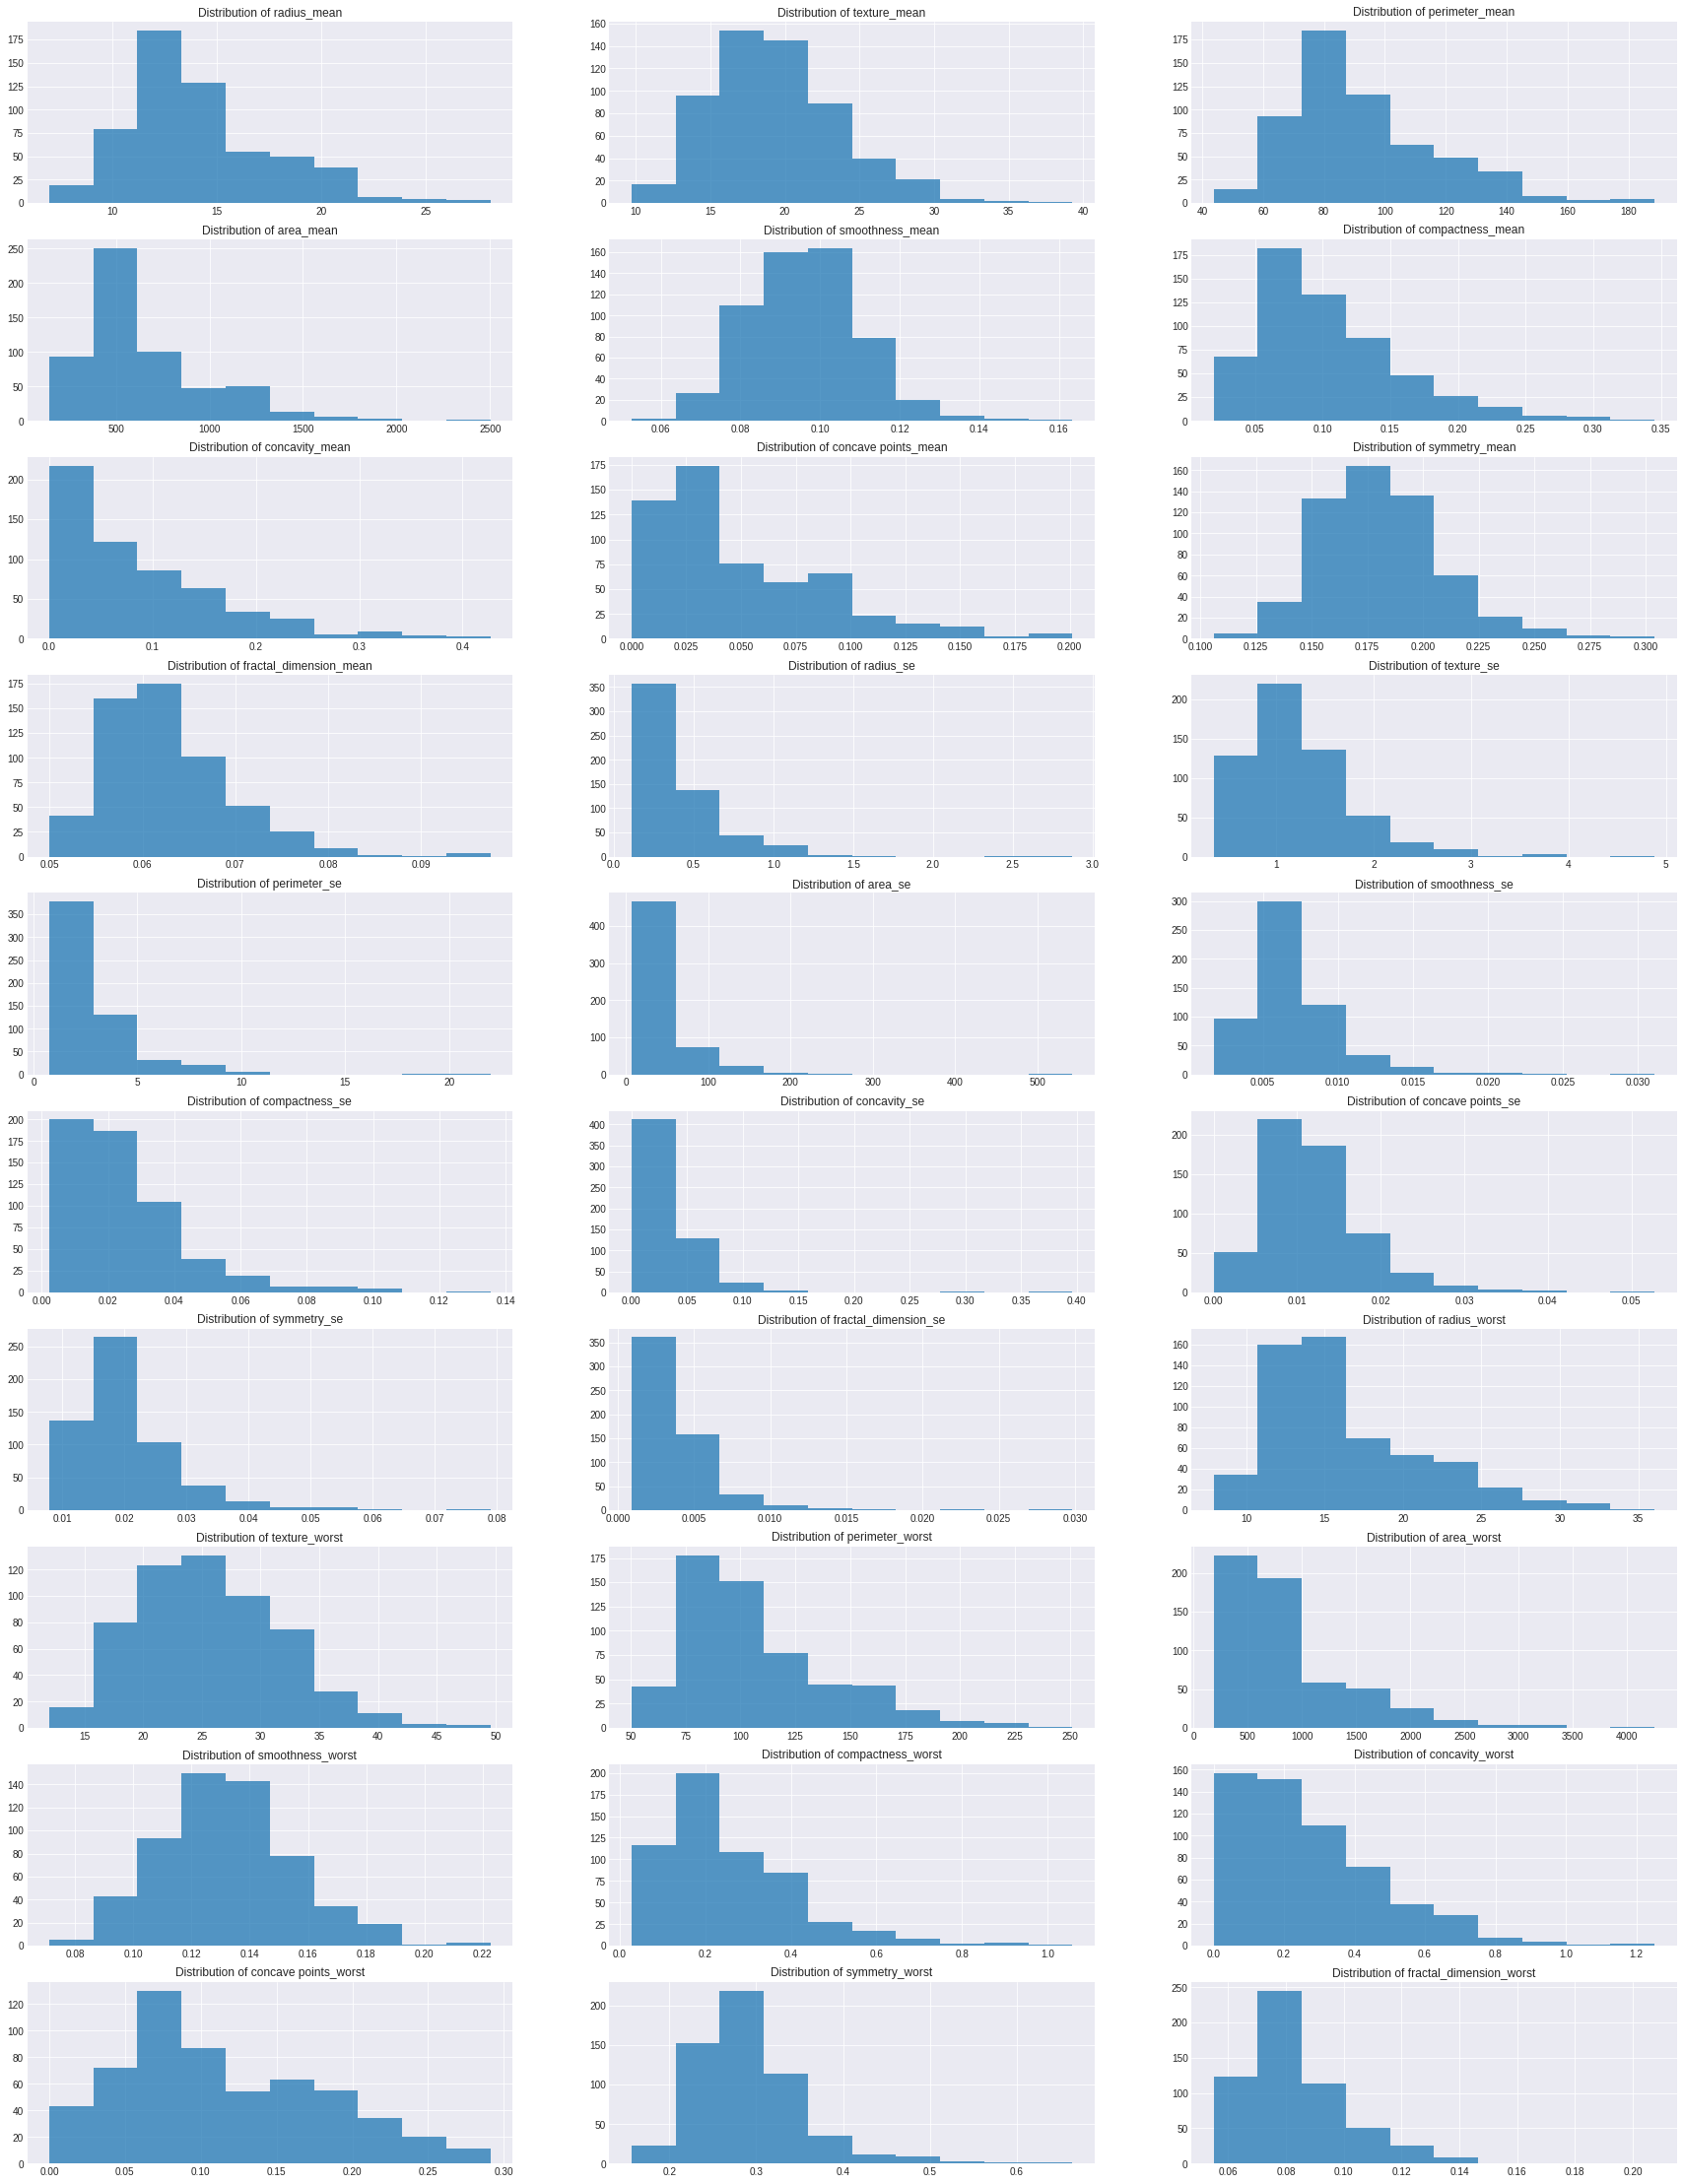

In [14]:
data_feature=data.drop(['diagnosis'],axis=1).columns

fig,ax=plt.subplots(figsize=(30,40),nrows=10,ncols=3)
ax=ax.flatten()
for i,feature in enumerate(data_feature):
  ax[i].hist(data[feature], alpha=0.75)
  ax[i].set_title("Distribution of "+feature)
  

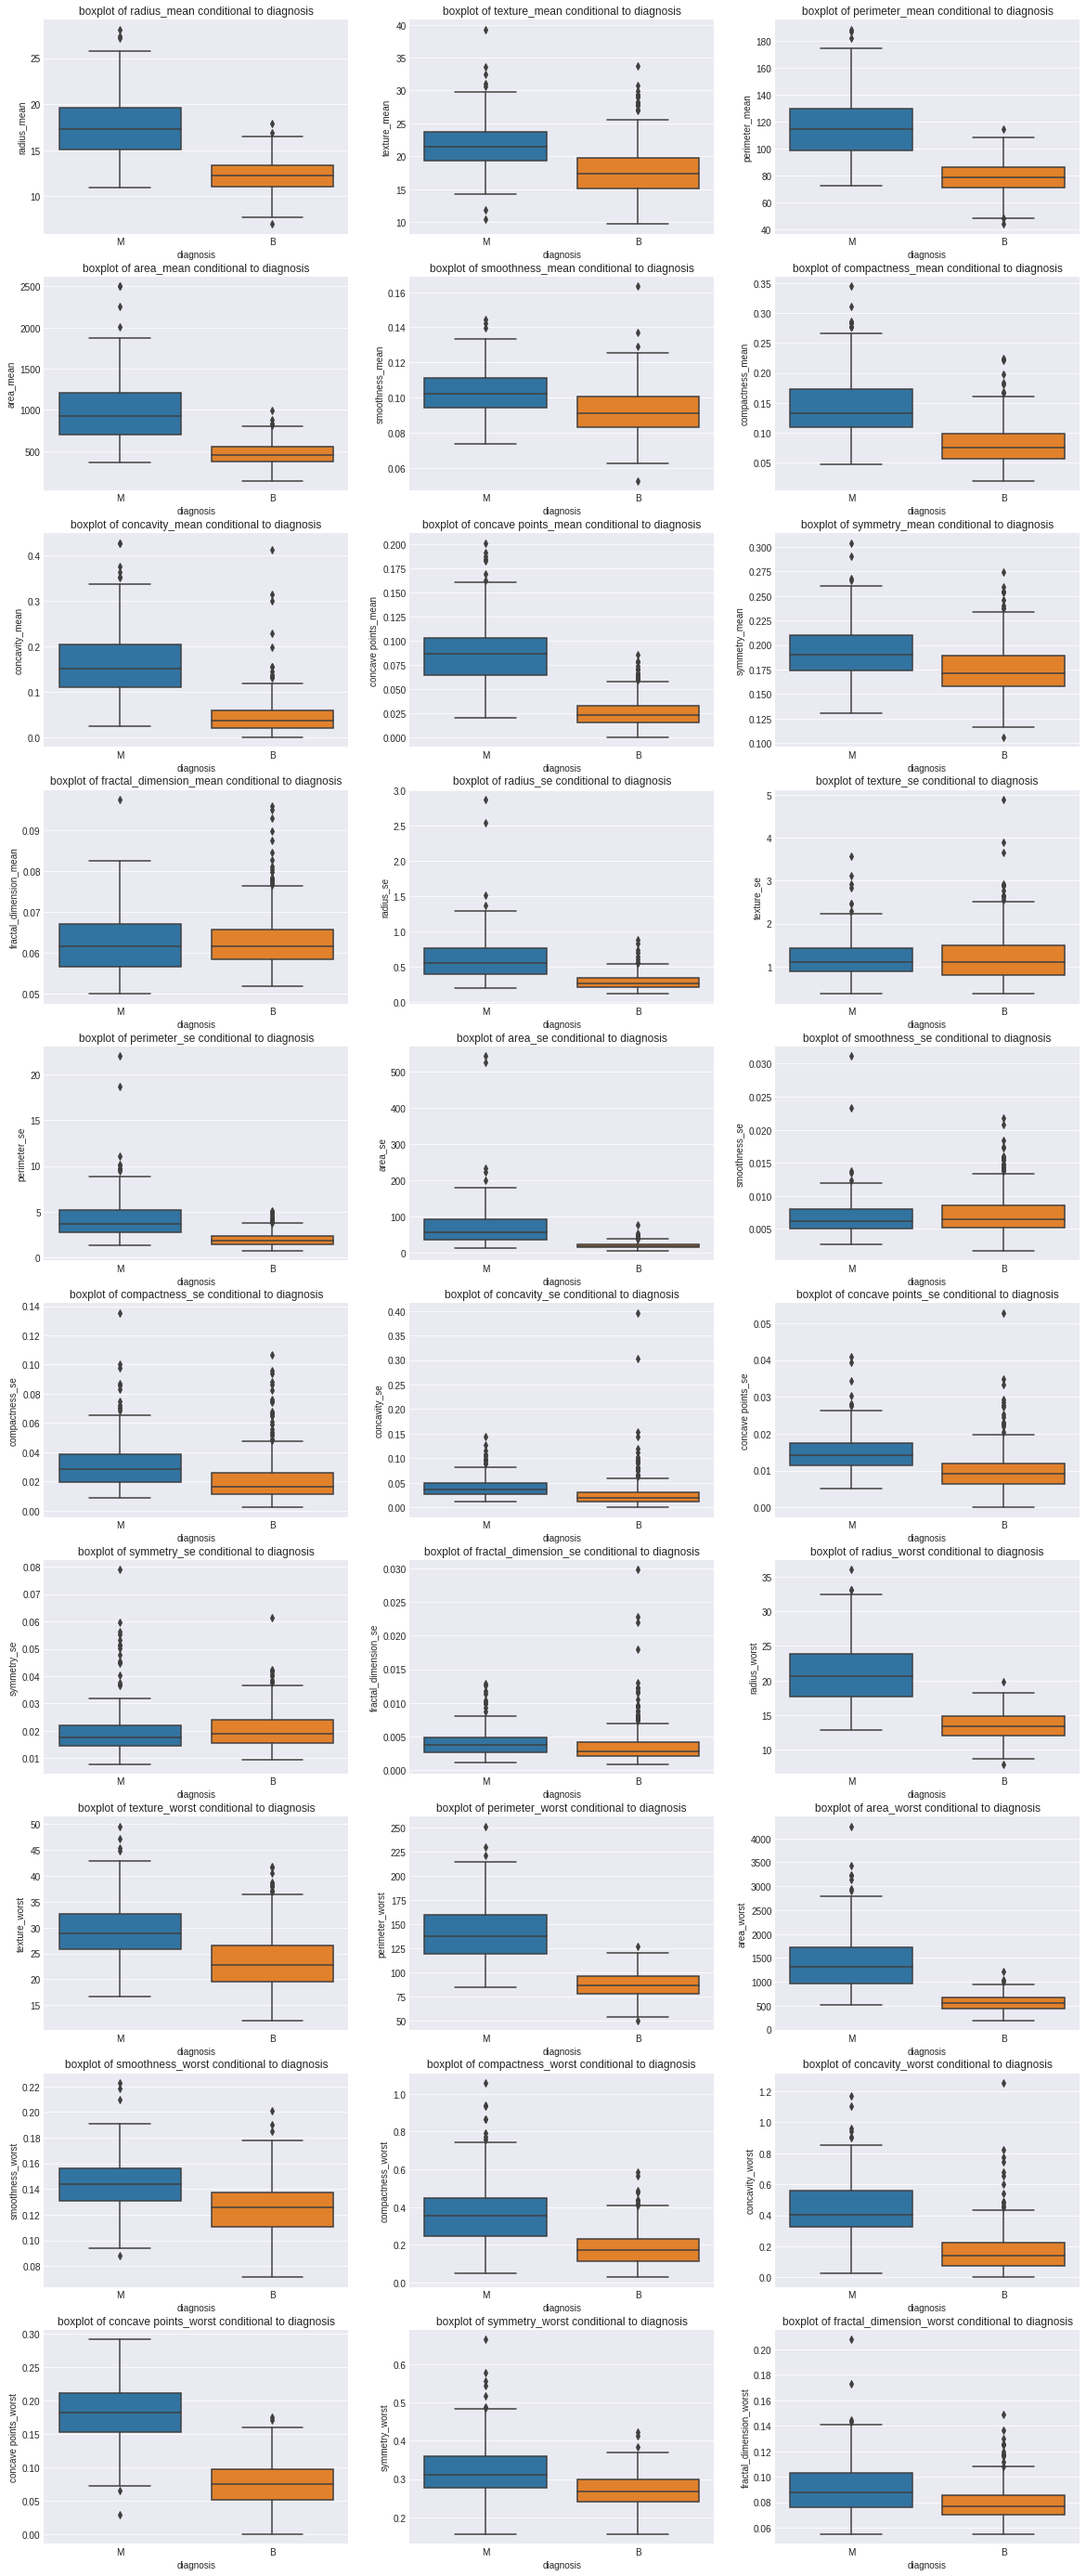

In [15]:
#Conditional distribution of each numeric features

fig,ax=plt.subplots(figsize=(20,50),nrows=10,ncols=3)
ax=ax.flatten()

for i,feature in enumerate(data_feature):
  sns.boxplot(x='diagnosis',y=feature,data=data,ax=ax[i])
  ax[i].set_title('boxplot of '+feature+' conditional to diagnosis')


In [17]:
df=data.copy()
d=pd.get_dummies(df['diagnosis'])
df=pd.concat([df,d],axis=1)

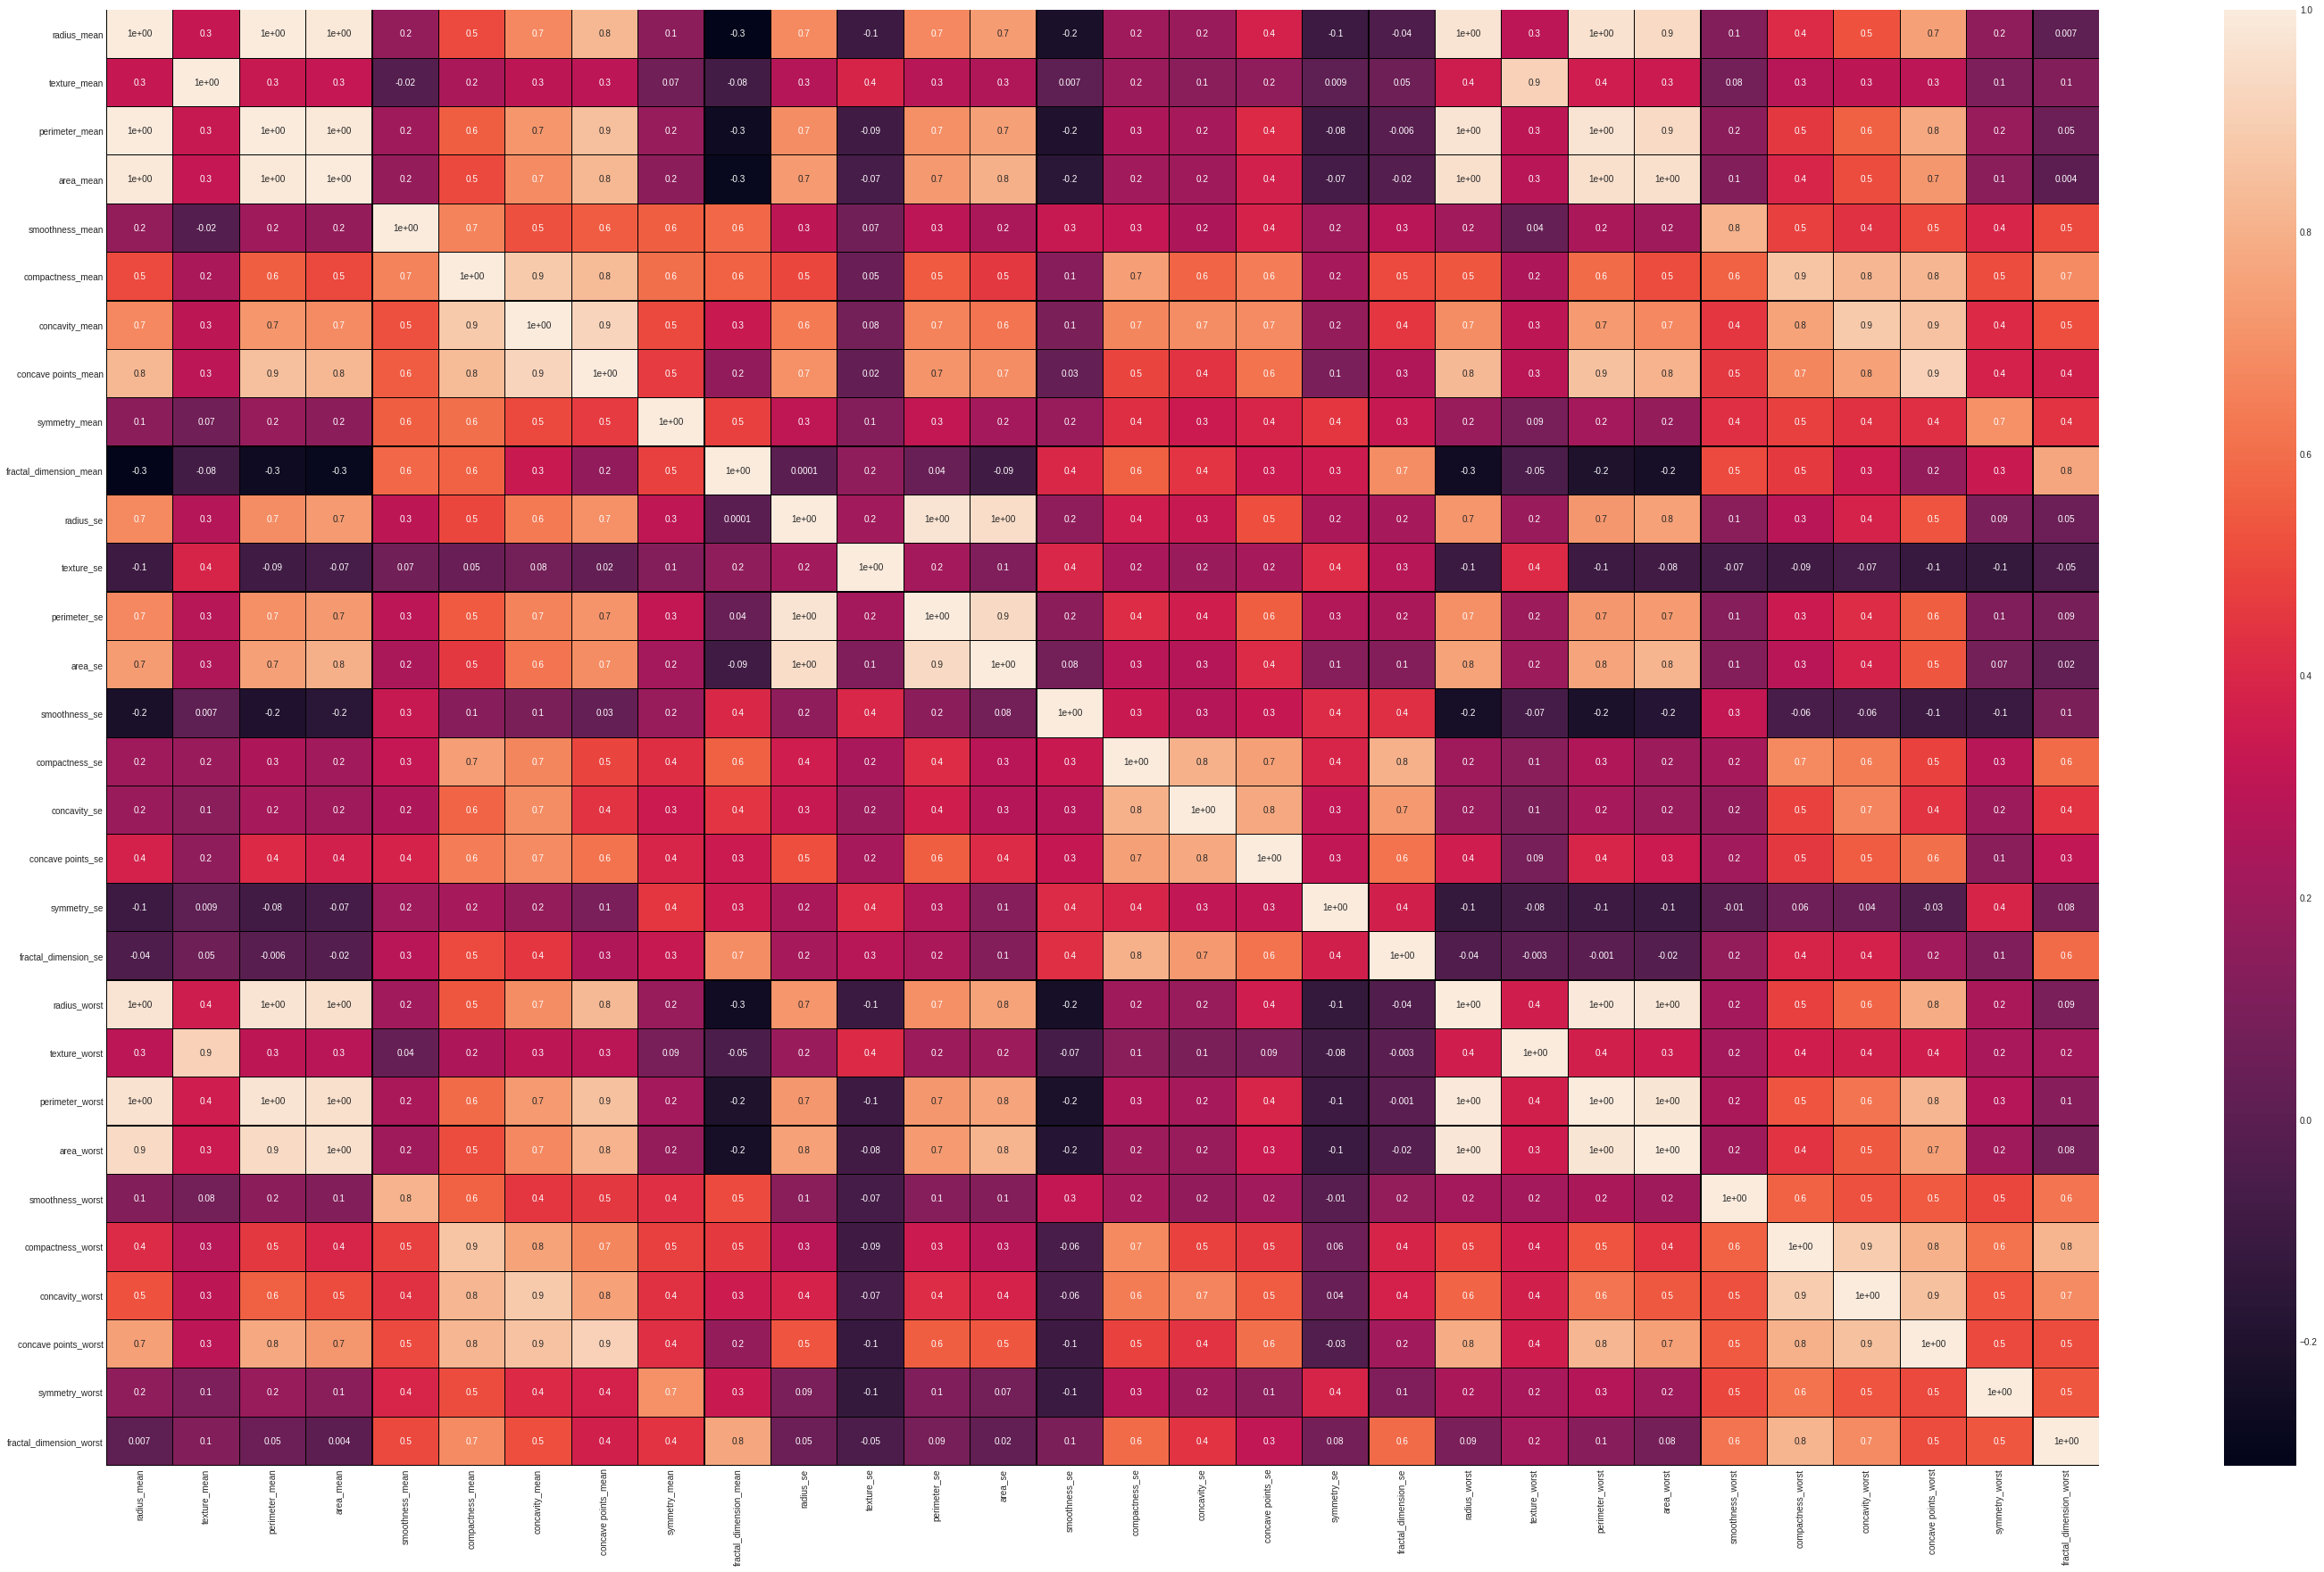

In [74]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(),annot=True,fmt='0.1',linewidths=0.2,linecolor='black')

Visually, it seems that most of numeric features seem to be having a very decent predicting power of a target variable. With this heatmap we can see which feature has a big impact of the target.

We want to confirm that with a test of independace and see which feature has the biggest impact on the target variable. 

# **Independance test**

In [20]:
from scipy.stats import ttest_ind

In [75]:
label='diagnosis'


In [23]:
dic={'Categorical':[],'Numerical':[],'p-value':[],'p-value<0.05':[],'test-statistic':[]}
assert data[label].unique().size == 2

for feature in data_feature:

  value1=data[label].unique()[0]
  value2=data[label].unique()[1]

  A=data[data[label]==value1][feature].values
  B=data[data[label]==value2][feature].values

  statistic,pval=ttest_ind(A,B)

  dic['Categorical'].append(label)
  dic['Numerical'].append(feature)
  dic['p-value'].append(pval)
  dic['p-value<0.05'].append(pval<0.05)
  dic['test-statistic'].append(statistic)

In [25]:
test_ind=pd.DataFrame(dic)

In [26]:
test_ind

,Categorical,Numerical,p-value,p-value<0.05,test-statistic
0,diagnosis,radius_mean,8.465941e-96,True,25.435822
1,diagnosis,texture_mean,4.058636e-25,True,10.867201
2,diagnosis,perimeter_mean,8.436251e-101,True,26.405213
3,diagnosis,area_mean,4.734564e-88,True,23.938687
4,diagnosis,smoothness_mean,1.051850e-18,True,9.146099
5,diagnosis,compactness_mean,3.938263e-56,True,17.698392
6,diagnosis,concavity_mean,9.966556e-84,True,23.103963
7,diagnosis,concave points_mean,7.101150e-116,True,29.354319
8,diagnosis,symmetry_mean,5.733384e-16,True,8.338312
9,diagnosis,fractal_dimension_mean,7.599368e-01,False,-0.305711


In [27]:
test_ind['p-value<0.05'].value_counts()

True     25
False     5
Name: p-value<0.05, dtype: int64

In [28]:
feature_independance=test_ind.loc[test_ind['p-value<0.05']==False]['Numerical']

In [29]:
feature_independance

9     fractal_dimension_mean
11                texture_se
14             smoothness_se
18               symmetry_se
19      fractal_dimension_se
Name: Numerical, dtype: object

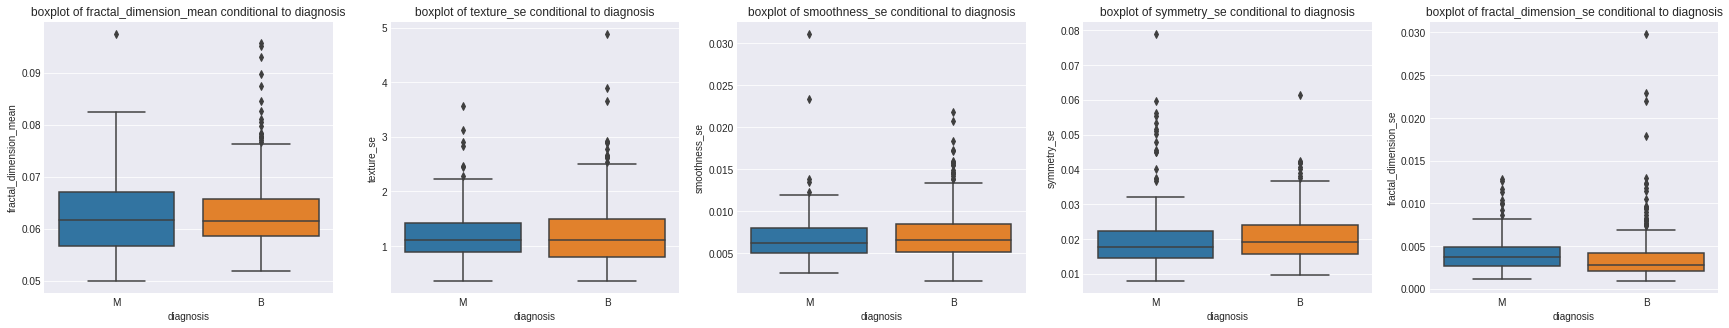

In [30]:
fig,ax=plt.subplots(figsize=(30,5),nrows=1,ncols=5)
ax=ax.flatten()
for i,feature in enumerate(feature_independance):
  sns.boxplot(x='diagnosis',y=feature,data=data,ax=ax[i])
  ax[i].set_title('boxplot of '+feature+' conditional to diagnosis')

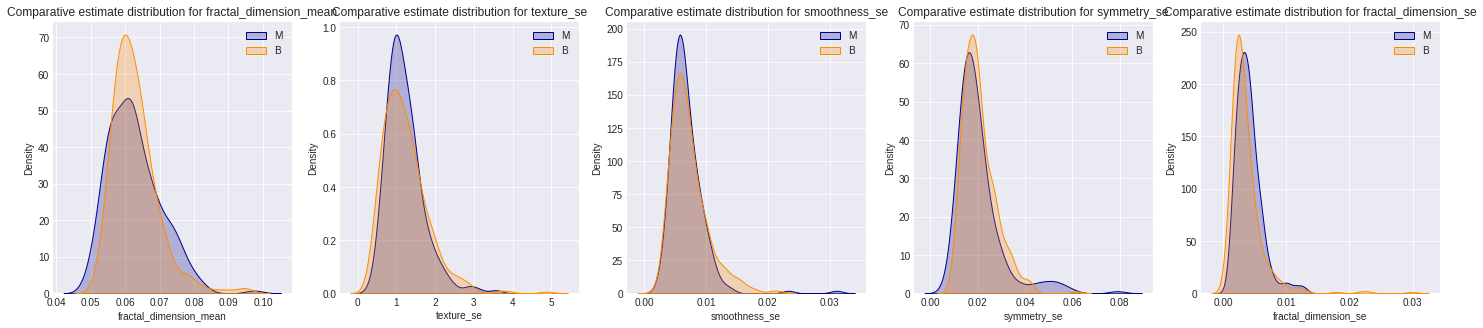

In [31]:
plt.figure(figsize=(30,5))
for i,feature in enumerate(feature_independance):
  plt.subplot(1,6,i+1)
  sns.kdeplot(data[feature].loc[data[label]=='M'],color='darkblue',label='M',shade=True)
  sns.kdeplot(data[feature].loc[data[label]=='B'],color='darkorange',label='B',shade=True)
  plt.legend(loc='best')
  plt.title("Comparative estimate distribution for "+feature)

All of theses features have quite the same distribution (same mean) if they belong to the M or B classe's. It's why the independance test has selected them.

Now let's have a look on the others features. We want to see which one has the biggest impact on the target.

For that purpose we can have a look on the feature associate to the lowest p-value.

In [32]:
test_ind_sorted=test_ind.sort_values(by='p-value',ascending=True)

In [33]:
test_ind_sorted.head()

,Categorical,Numerical,p-value,p-value<0.05,test-statistic
27,diagnosis,concave points_worst,1.969100e-124,True,31.054555
22,diagnosis,perimeter_worst,5.771397e-119,True,29.965717
7,diagnosis,concave points_mean,7.101150e-116,True,29.354319
20,diagnosis,radius_worst,8.482292e-116,True,29.339082
2,diagnosis,perimeter_mean,8.436251e-101,True,26.405213


We selection the top 5 features with the lowest p-values

In [34]:
most_important_feature=test_ind_sorted['Numerical'][:5]

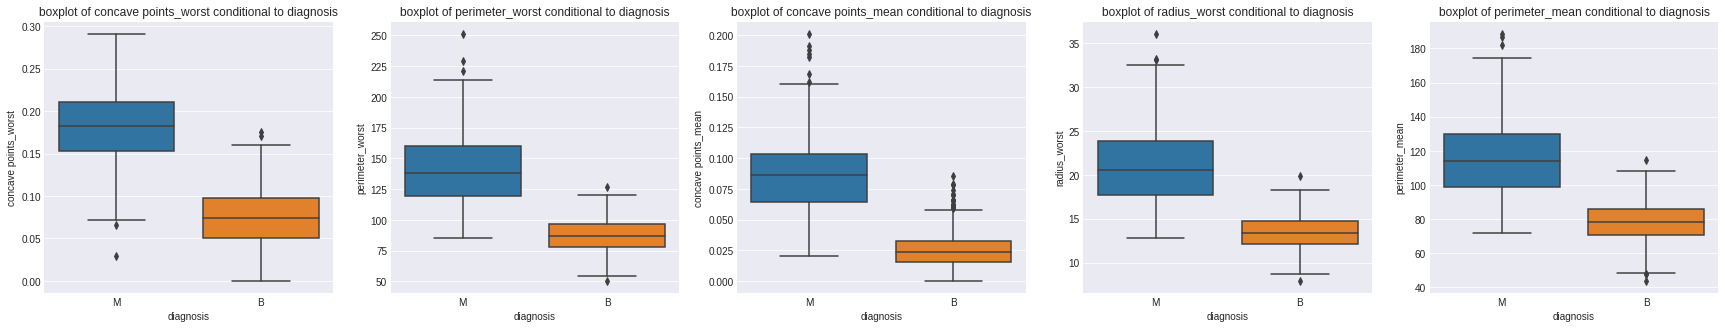

In [35]:
fig,ax=plt.subplots(figsize=(30,5),nrows=1,ncols=5)
ax=ax.flatten()
for i,feature in enumerate(most_important_feature):
  sns.boxplot(x='diagnosis',y=feature,data=data,ax=ax[i])
  ax[i].set_title('boxplot of '+feature+' conditional to diagnosis')

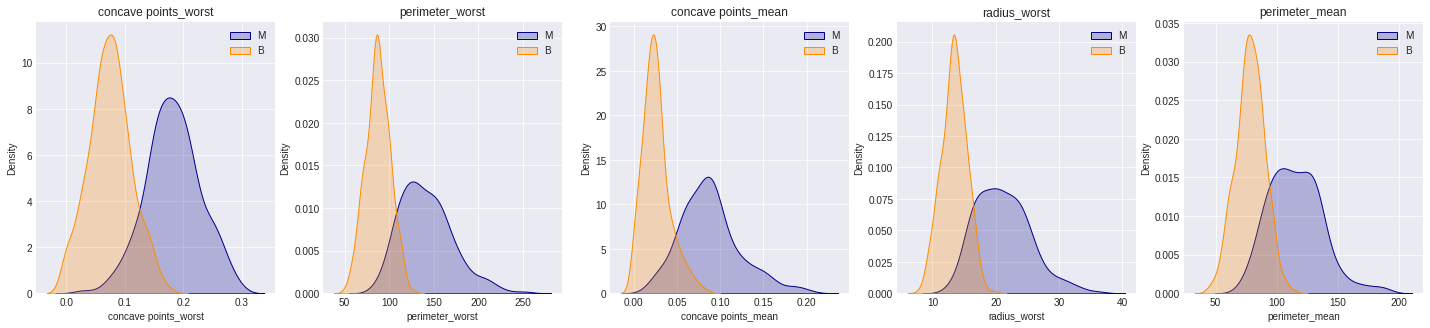

In [36]:
plt.figure(figsize=(30,5))
for i,feature in enumerate(most_important_feature):
  plt.subplot(1,6,i+1)
  sns.kdeplot(data[feature].loc[data[label]=='M'],color='darkblue',label='M',shade=True)
  sns.kdeplot(data[feature].loc[data[label]=='B'],color='darkorange',label='B',shade=True)
  plt.legend(loc='best')
  plt.title(feature)

# **Training and Test set**

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [38]:
df=data.drop(['diagnosis'],axis=1)

In [39]:
X=df
le=LabelEncoder()
Y=le.fit_transform(data['diagnosis'])

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [41]:
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (455, 30)
Shape of y_train : (455,)
Shape of x_test : (114, 30)
Shape of y_test : (114,)


# **Modelling**

In [43]:
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RepeatedKFold

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [44]:
Bilan={"Model":[],"Accuracy":[],"Precision":[],'Recall':[]}

### **Logistic regression**

In [ ]:
grid1={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

model_LGR=GridSearchCV(LogisticRegression(),param_grid=grid1,cv=RepeatedKFold())

model_LGR.fit(x_train,y_train)

In [46]:
print('Best parameter: ' + str(model_LGR.best_params_))

Best parameter: {'C': 10.0, 'penalty': 'l2'}


In [47]:
y_LGR_pred=model_LGR.predict(x_test)

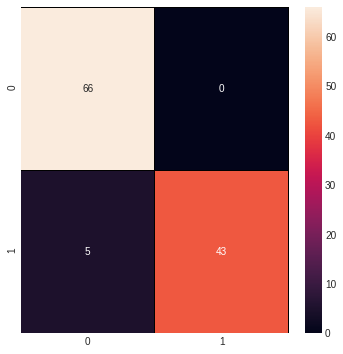

In [48]:
cf=confusion_matrix(y_test,y_LGR_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cf,annot=True,linewidths=0.2,linecolor='black')

In [49]:
Bilan['Model'].append("Locgistic Regression")
Bilan['Accuracy'].append(np.round(accuracy_score(y_test,y_LGR_pred),decimals=3))
Bilan['Precision'].append(np.round(precision_score(y_test,y_LGR_pred),decimals=3))
Bilan['Recall'].append(np.round(recall_score(y_test,y_LGR_pred),decimals=3))

### **RandomForest Classifier**

In [ ]:
grid2={'max_depth':[10,20,50,100],'min_samples_leaf':[1,5,10,20],'n_estimators':[100,200,500]}
model_RF=GridSearchCV(RandomForestClassifier(),param_grid=grid2,cv=RepeatedKFold())

model_RF.fit(x_train,y_train)

In [51]:
print('Best parameter: ' + str(model_RF.best_params_))

Best parameter: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}


In [52]:
y_RF_pred=model_RF.predict(x_test)

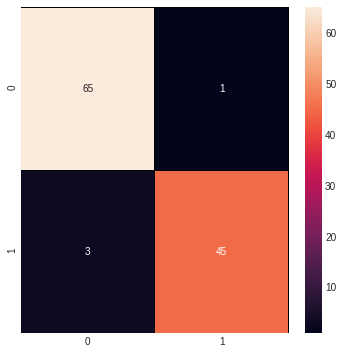

In [53]:
cf2=confusion_matrix(y_test,y_RF_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cf2,annot=True,linewidths=0.2,linecolor='black')

In [54]:
Bilan['Model'].append("Random Forest")
Bilan['Accuracy'].append(np.round(accuracy_score(y_test,y_RF_pred),decimals=3))
Bilan['Precision'].append(np.round(precision_score(y_test,y_RF_pred),decimals=3))
Bilan['Recall'].append(np.round(recall_score(y_test,y_RF_pred),decimals=3))

### **SVM Classifier**

In [ ]:
grid3={"kernel": ["rbf"], "C": [15, 20, 25, 30, 35, 40, 45], "gamma": [0.0005, 0.001, 0.005, 0.01, 0.05]}

model_SVM=GridSearchCV(SVC(),param_grid=grid3,cv=RepeatedKFold())

model_SVM.fit(x_train,y_train)

In [56]:
print('Best parameter: ' + str(model_SVM.best_params_))

Best parameter: {'C': 40, 'gamma': 0.0005, 'kernel': 'rbf'}


In [57]:
y_SVM_pred=model_SVM.predict(x_test)

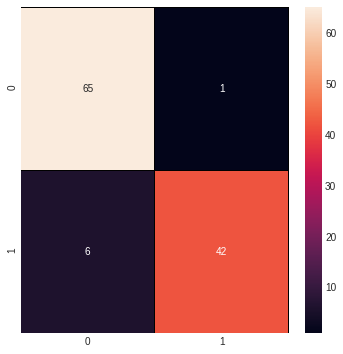

In [58]:
cf3=confusion_matrix(y_test,y_SVM_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cf3,annot=True,linewidths=0.2,linecolor='black')

In [59]:
Bilan['Model'].append("SVM")
Bilan['Accuracy'].append(np.round(accuracy_score(y_test,y_SVM_pred),decimals=3))
Bilan['Precision'].append(np.round(precision_score(y_test,y_SVM_pred),decimals=3))
Bilan['Recall'].append(np.round(recall_score(y_test,y_SVM_pred),decimals=3))

In [60]:
Bilan

{'Accuracy': [0.956, 0.965, 0.939],
 'Model': ['Locgistic Regression', 'Random Forest', 'SVM'],
 'Precision': [1.0, 0.978, 0.977],
 'Recall': [0.896, 0.938, 0.875]}

### **KNN Classifier**

In [ ]:
grid4 = {'n_neighbors':np.arange(1,50)}

model_KNN=GridSearchCV(KNeighborsClassifier(),param_grid=grid4,cv=RepeatedKFold())

model_KNN.fit(x_train,y_train)

In [62]:
print('Best parameter: ' + str(model_KNN.best_params_))

Best parameter: {'n_neighbors': 9}


In [63]:
y_KNN_pred=model_KNN.predict(x_test)

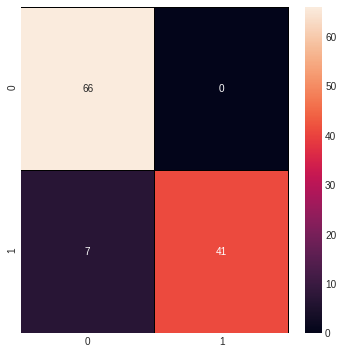

In [64]:
cf4=confusion_matrix(y_test,y_KNN_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cf4,annot=True,linewidths=0.2,linecolor='black')

In [65]:
Bilan['Model'].append("KNN")
Bilan['Accuracy'].append(np.round(accuracy_score(y_test,y_KNN_pred),decimals=3))
Bilan['Precision'].append(np.round(precision_score(y_test,y_KNN_pred),decimals=3))
Bilan['Recall'].append(np.round(recall_score(y_test,y_KNN_pred),decimals=3))

### **XGBOOST Classifier**

In [66]:
import xgboost as xgb

In [ ]:
model_XGB = xgb.XGBClassifier()
model_XGB.fit(x_train, y_train)

In [68]:
y_XGB_pred=model_XGB.predict(x_test)

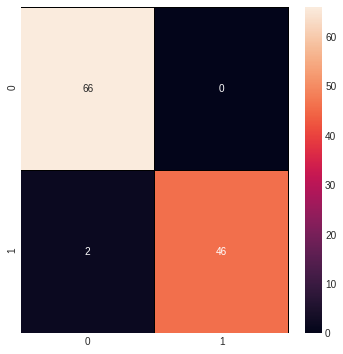

In [69]:
cf5=confusion_matrix(y_test,y_XGB_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cf5,annot=True,linewidths=0.2,linecolor='black')

In [70]:
Bilan['Model'].append("XGB")
Bilan['Accuracy'].append(np.round(accuracy_score(y_test,y_XGB_pred),decimals=3))
Bilan['Precision'].append(np.round(precision_score(y_test,y_XGB_pred),decimals=3))
Bilan['Recall'].append(np.round(recall_score(y_test,y_XGB_pred),decimals=3))

# **Conclusion**

In [71]:
Result=pd.DataFrame(Bilan)

In [72]:
Result.head()

,Model,Accuracy,Precision,Recall
0,Locgistic Regression,0.956,1.000,0.896
1,Random Forest,0.965,0.978,0.938
2,SVM,0.939,0.977,0.875
3,KNN,0.939,1.000,0.854
4,XGB,0.982,1.000,0.958
